# UFO Sightings VS Characteristics of the Observing Population
##### Cody Costa, David Loi, Tue Pham
*Group 8*\
.\
.
### links to sample data:
##### [UFOs](https://nuforc.org/subndx/?id=all) | [Population](https://worldpopulationreview.com/states) | [Education](https://worldpopulationreview.com/state-rankings/educational-attainment-by-state) | [Intelligence](https://katiecouric.com/lifestyle/travel/smartest-states-in-us/) | [Drug Activity](https://wallethub.com/edu/drug-use-by-state/35150)

# Synopsis:
##### this project attempts to illustrate a statistical link between cumulative cases of UFO sightings in the US with respect to characteristics of the general population inluding:

1. Average Standardized Intellience Metrics 
    - IQ
    - SAT
    - Literacy
    - Numeracy
2. Education Level
3. Population size
4. Average Drug Addiction Rates

> [!NOTE]\
> Our UFO reports data is a sample of the 5000 most recent cases in the US out of hundreds of thousands available\
> The reality is that web scraping is kind of a pain in the butt
---

# Hypotheses

### Null Hypothesis
##### *NO relation is seen between UFO sightings and the characteristics of the observing population*
.\
.
### Alternate Hypothesis
##### *UFO sightings will INCREASE proportionally to a weighted combination of observer characteristics*
---

## Python Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import os
import statsmodels.api as smf
from IPython.display import display, Math, Latex

## Useful Helper Functions

In [3]:
# function for placing chart annotations 

def chart_coords(x_arr: np.ndarray, y_arr: np.ndarray, position: str) -> tuple:
    
    if position == 'ul':    # gather upper left coords
        return (0.95 * np.min(x_arr) + 0.05 * np.max(x_arr), 0.05 * np.min(y_arr) + 0.95 * np.max(y_arr))
    
    elif position == 'ur':  # gather upper right coords
        return (0.05 * np.min(x_arr) + 0.95 * np.max(x_arr), 0.05 * np.min(y_arr) + 0.95 * np.max(y_arr))
    
    elif position == 'll':  # gather lower left coords
        return (0.95 * np.min(x_arr) + 0.05 * np.max(x_arr), 0.95 * np.min(y_arr) + 0.05 * np.max(y_arr))
    
    elif position == 'lr':  # gather lower right coords
        return (0.05 * np.min(x_arr) + 0.95 * np.max(x_arr), 0.95 * np.min(y_arr) + 0.05 * np.max(y_arr))
    
    

# Part 1:
## Create a Normalized Set of UFO Occurrence Data Based on Population Size
this will serve as the dependent variable through our analysis

## UFO Sightings

In [4]:
data = pd.read_csv('ufo-data-more.csv', sep=',')
data.head()

,Occurred,City,State,Country
0,06/10/2024 03:15,La Pine,OR,USA
1,06/09/2024 17:20,New York,NY,USA
2,06/09/2024 03:01,Satellite Beach,FL,USA
3,06/09/2024 01:14,Coopersville,MI,USA
4,06/08/2024 22:11,Boone,NC,USA


In [5]:
data.shape

(5233, 4)

#### Filter Results
a visual inspection of the data shows some odd state names such as '-' or '0', etc.

In [6]:
data.describe()

,Occurred,City,State,Country
count,5233,5171,5233,5233
unique,4951,3009,54,1
top,10/13/2023 19:35,Los Angeles,CA,USA
freq,11,35,596,5233


In [7]:
f = []
for row in data['State']:
    if len(row) == 2:
        f.append(True)
    else:
        f.append(False)

print(len(set(data[f]['State'])))

data = data[f]

HEIGHT = data.shape[0]
WIDTH  = data.shape[1]

52


#### Distribution of Total Occurrences

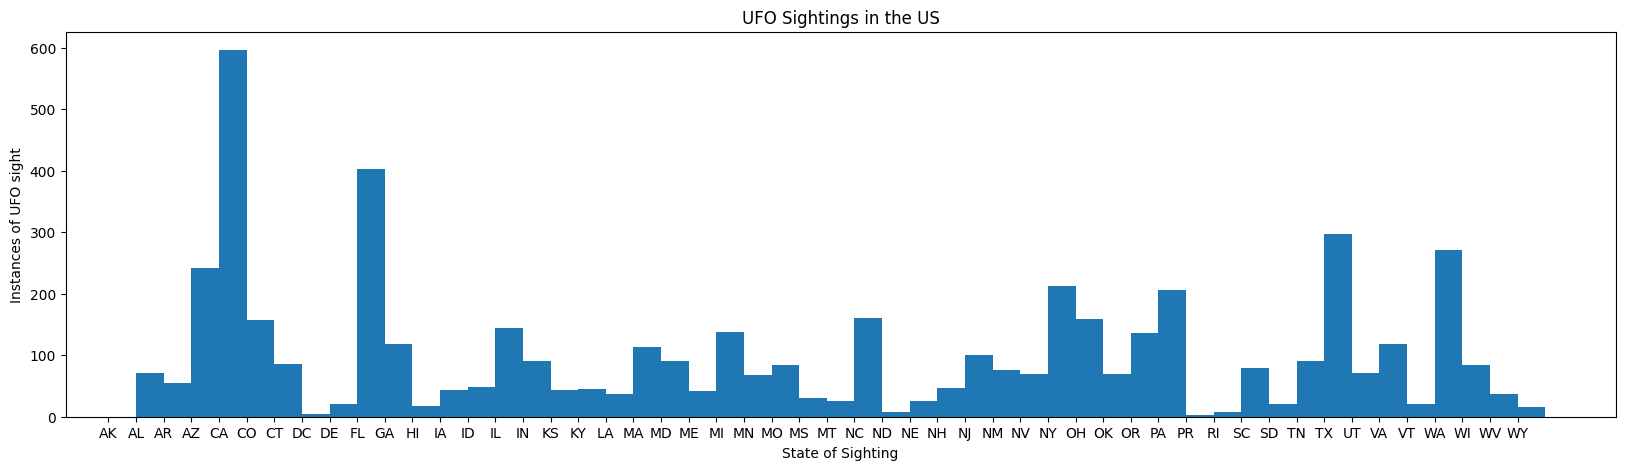

In [8]:
states = data['State']
bins = range(1, len(set(data['State'])) + 1)

plt.figure(figsize=[20, 5])
plt.hist(states.sort_values(), bins=bins)
plt.xlabel('State of Sighting')
plt.ylabel('Instances of UFO sight')
plt.title('UFO Sightings in the US')
plt.show()

## Population Sizes

In [9]:
pop = pd.read_csv('populations.csv', sep=',')
pop.head()

# each column is loaded as str type

,Rank,State Abbreviation,State,2024 Population,Growth Rate,2023 Population,2020 Population,Growth Since 2020,% of US,Density
0,1,CA,California,38889770,-0.0019,38965193,39503200,-0.0155,0.1158,250
1,2,TX,Texas,30976754,0.0155,30503301,29234361,0.0596,0.0922,119
2,3,FL,Florida,22975931,0.0162,22610726,21591299,0.0641,0.0684,428
3,4,NY,New York,19469232,-0.0052,19571216,20104710,-0.0316,0.0580,413
4,5,PA,Pennsylvania,12951275,-0.0008,12961683,12995477,-0.0034,0.0386,289


In [10]:
pop.shape

(50, 10)

#### Distribution of Occurrences Normalized by Population Size

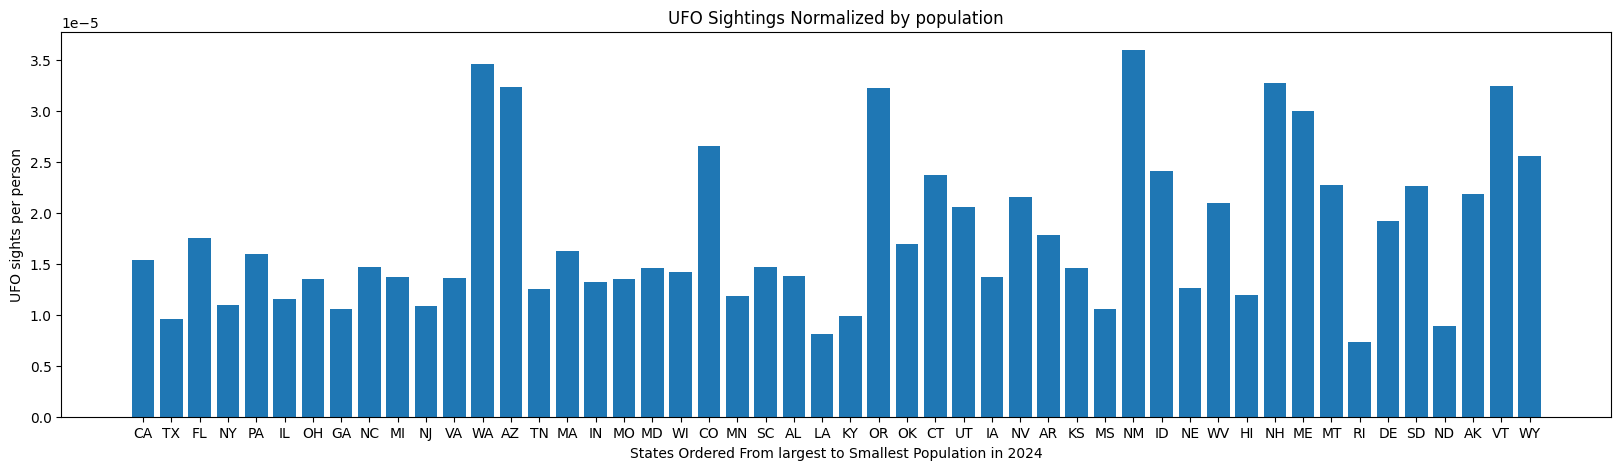

In [11]:
# creating a bar graph here

normalized_ufo_sightings = np.array([])

for idx, state in enumerate(pop['State Abbreviation']):
    sights = np.sum(data['State'] == state)
    population = pop['2024 Population'][idx]

    normalized_ufo_sightings = np.append(normalized_ufo_sightings, sights / population)

plt.figure(figsize=[20, 5])
plt.bar(pop['State Abbreviation'], normalized_ufo_sightings)
plt.xlabel('States Ordered From largest to Smallest Population in 2024')
plt.ylabel('UFO sights per person')
plt.title('UFO Sightings Normalized by population')
plt.show()

# Part 2:
## Analysis of Environmental / Personal Factors

## Cognition / Intelligence

In [12]:
iq_data = pd.read_csv('iq-scores.csv', sep=',')
iq_data.head()

,Rank,State Abbreviation,State,Average I.Q.,Literacy Rate,Numeracy Rate,Average SAT Score
0,1,MA,Massachusetts,104.3,0.827,0.749,1029
1,2,NH,New Hampshire,104.2,0.885,0.809,1050
2,3,ND,North Dakota,103.8,0.866,0.790,1212
3,4,VT,Vermont,103.8,0.872,0.790,1095
4,5,MN,Minnesota,103.7,0.869,0.796,1225


In [13]:
iq_data.shape

(50, 7)

#### Quick Data of SAT Scores and Avg I.Q.

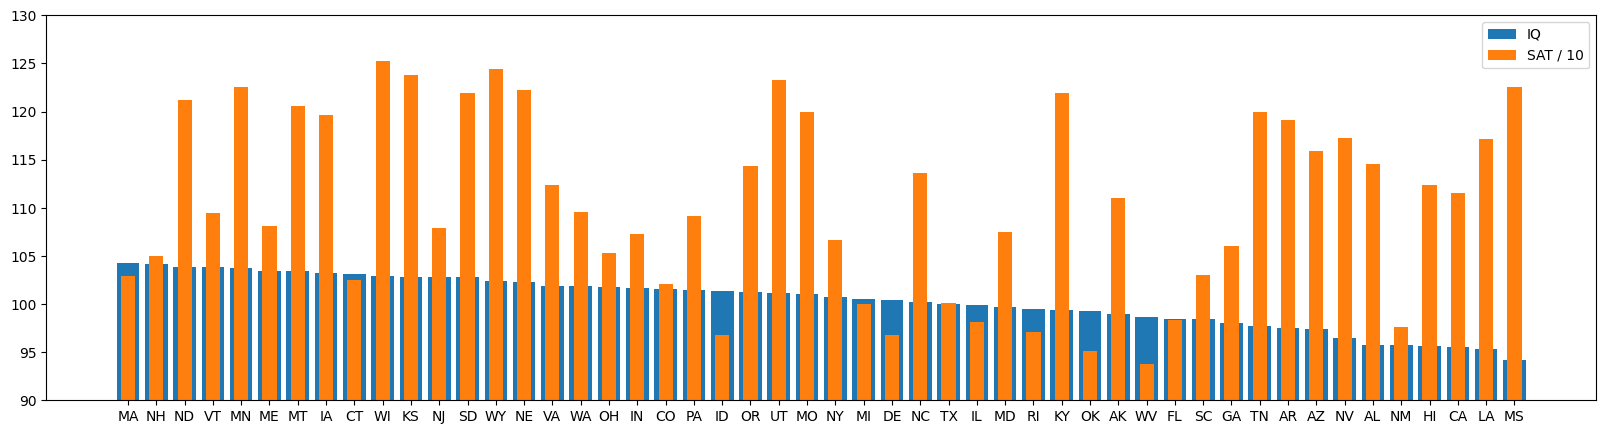

In [14]:
plt.figure(figsize=[20, 5])
plt.bar(iq_data['State Abbreviation'], iq_data['Average I.Q.'])
plt.bar(iq_data['State Abbreviation'], iq_data['Average SAT Score'] / 10, width=0.5)
plt.legend(['IQ', 'SAT / 10'])
plt.ylim([90, 130])

plt.show()

#### Normalized UFO sightings vs Intelligence Category

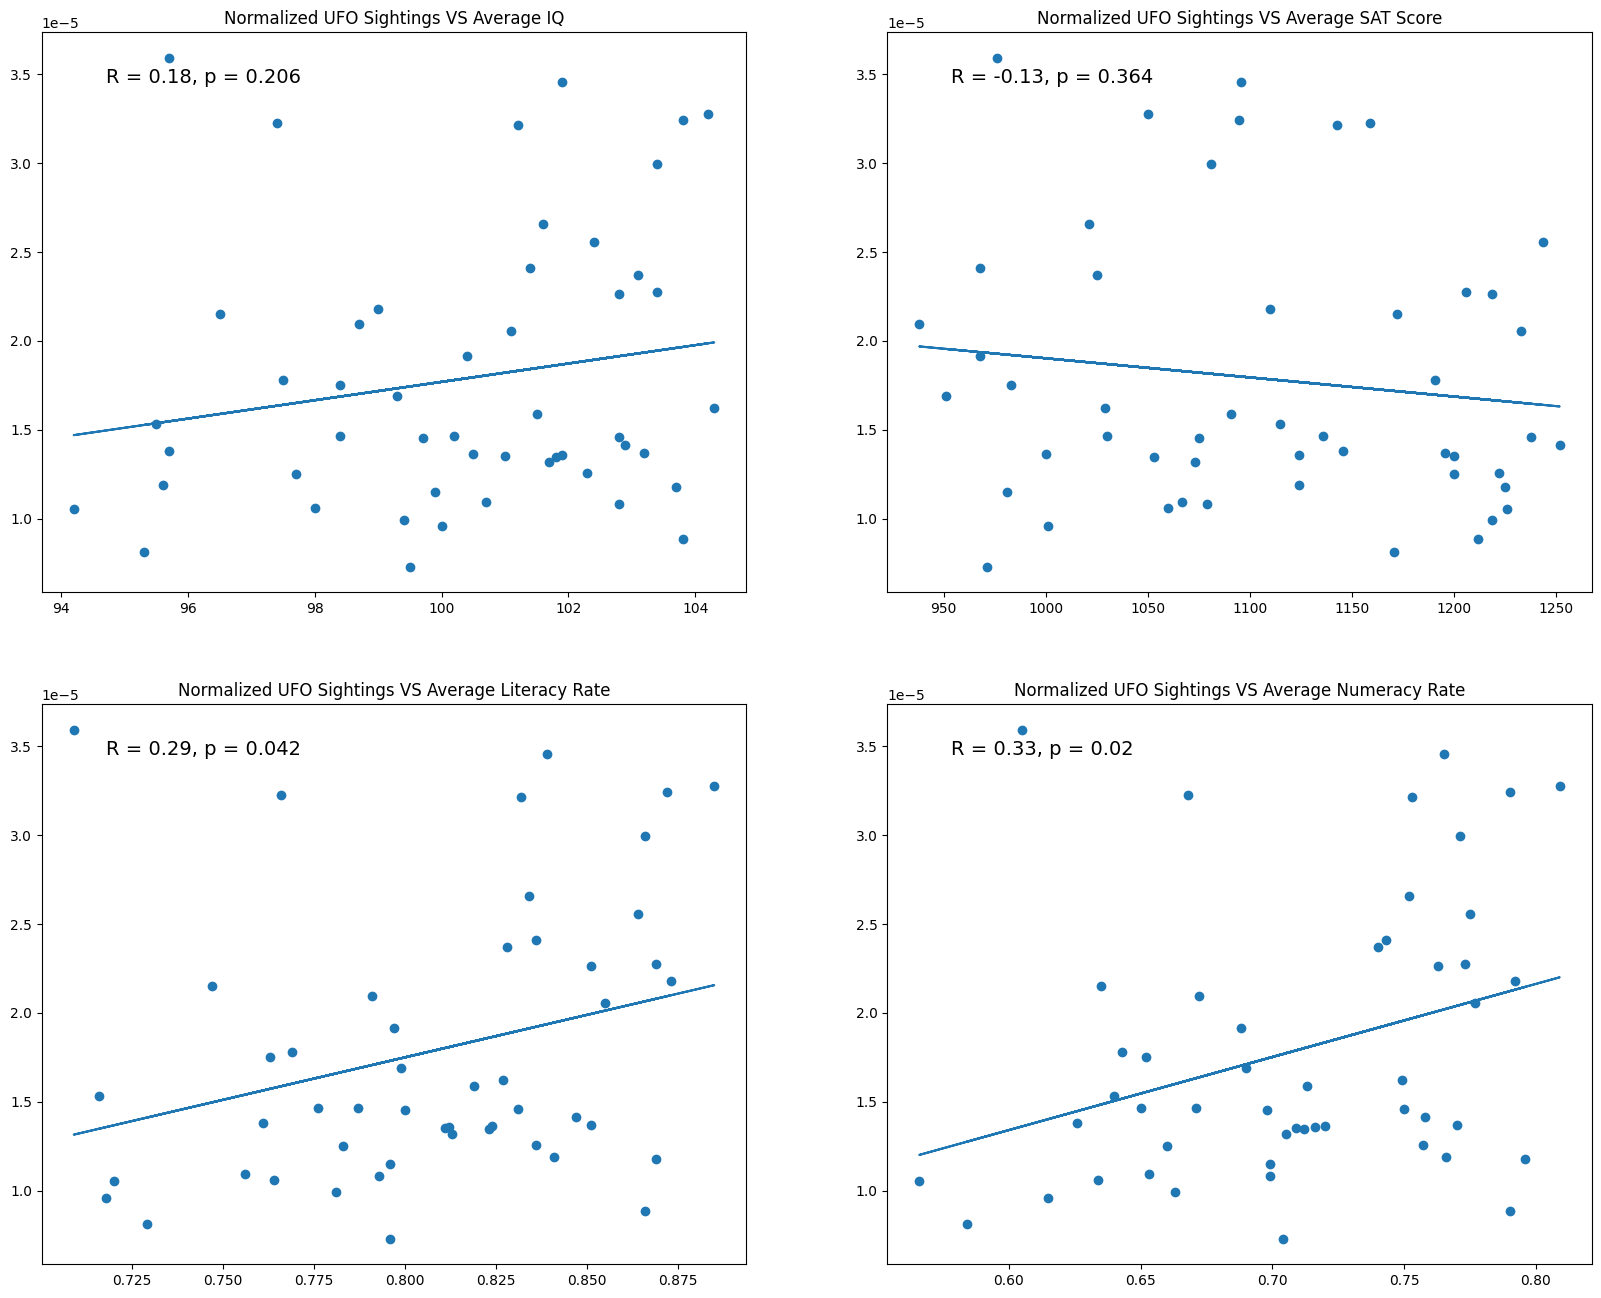

In [15]:
# data for plots

iq_scores   = np.array([])
sat_scores  = np.array([])
literacy    = np.array([])
numeracy    = np.array([])

for idx, state in enumerate(pop['State Abbreviation']):
    row = iq_data['State Abbreviation'] == state
    iq_scores   = np.append(iq_scores, iq_data[row]['Average I.Q.'])
    sat_scores  = np.append(sat_scores, iq_data[row]['Average SAT Score'])
    literacy    = np.append(literacy, iq_data[row]['Literacy Rate'])
    numeracy    = np.append(numeracy, iq_data[row]['Numeracy Rate'])

r1, p1 = stats.pearsonr(iq_scores, normalized_ufo_sightings)
r2, p2 = stats.pearsonr(sat_scores, normalized_ufo_sightings)
r3, p3 = stats.pearsonr(literacy, normalized_ufo_sightings)
r4, p4 = stats.pearsonr(numeracy, normalized_ufo_sightings)


# plots

fit, ax = plt.subplots(2, 2, figsize=[20, 16])

ax[0, 0].scatter(iq_scores, normalized_ufo_sightings)
ax[0, 0].set_title('Normalized UFO Sightings VS Average IQ')
ax[0, 0].annotate(f'R = {np.round(r1, 2)}, p = {np.round(p1, 3)}', chart_coords(iq_scores, normalized_ufo_sightings, position='ul'), fontsize=14)

ax[0, 1].scatter(sat_scores, normalized_ufo_sightings)
ax[0, 1].set_title('Normalized UFO Sightings VS Average SAT Score')
ax[0, 1].annotate(f'R = {np.round(r2, 2)}, p = {np.round(p2, 3)}', chart_coords(sat_scores, normalized_ufo_sightings, position='ul'), fontsize=14)

ax[1, 0].scatter(literacy, normalized_ufo_sightings)
ax[1, 0].set_title('Normalized UFO Sightings VS Average Literacy Rate')
ax[1, 0].annotate(f'R = {np.round(r3, 2)}, p = {np.round(p3, 3)}', chart_coords(literacy, normalized_ufo_sightings, position='ul'), fontsize=14)

ax[1, 1].scatter(numeracy, normalized_ufo_sightings)
ax[1, 1].set_title('Normalized UFO Sightings VS Average Numeracy Rate')
ax[1, 1].annotate(f'R = {np.round(r4, 2)}, p = {np.round(p4, 3)}', chart_coords(numeracy, normalized_ufo_sightings, position='ul'), fontsize=14)


# linear regression

m1, b1 = np.polyfit(iq_scores, normalized_ufo_sightings, 1)
m2, b2 = np.polyfit(sat_scores, normalized_ufo_sightings, 1)
m3, b3 = np.polyfit(literacy, normalized_ufo_sightings, 1)
m4, b4 = np.polyfit(numeracy, normalized_ufo_sightings, 1)

ax[0, 0].plot(iq_scores, m1 * iq_scores + b1)
ax[0, 1].plot(sat_scores, m2 * sat_scores + b2)
ax[1, 0].plot(literacy, m3 * literacy + b3)
ax[1, 1].plot(numeracy, m4 * numeracy + b4)

plt.show()

### Conclusion of Cognitive Analysis
    From the visualization of the cognitive ability data, there seems to be a clear positive correlation between the instances of UFO sightings per individual and the strength of the cognitive ability.
    
    The only exception to this outcome is seen among average SAT scores where we observe the opposite: a negative correlation between the 2 variables.

    It is worth noting these are all relatively weak correlations.
---

## Education Levels

In [16]:
education_data = pd.read_csv('education-levels.csv', sep='\t')
education_data.head()

,State,State Abbreviation,High School or Higher,Bachelors or Higher
0,Montana,MT,0.940,0.331
1,Wyoming,WY,0.936,0.282
2,Vermont,VT,0.935,0.397
3,Minnesota,MN,0.934,0.368
4,New Hampshire,NH,0.933,0.376


In [17]:
education_data.shape

(51, 4)

#### Normalized UFO Sightings VS Education Level

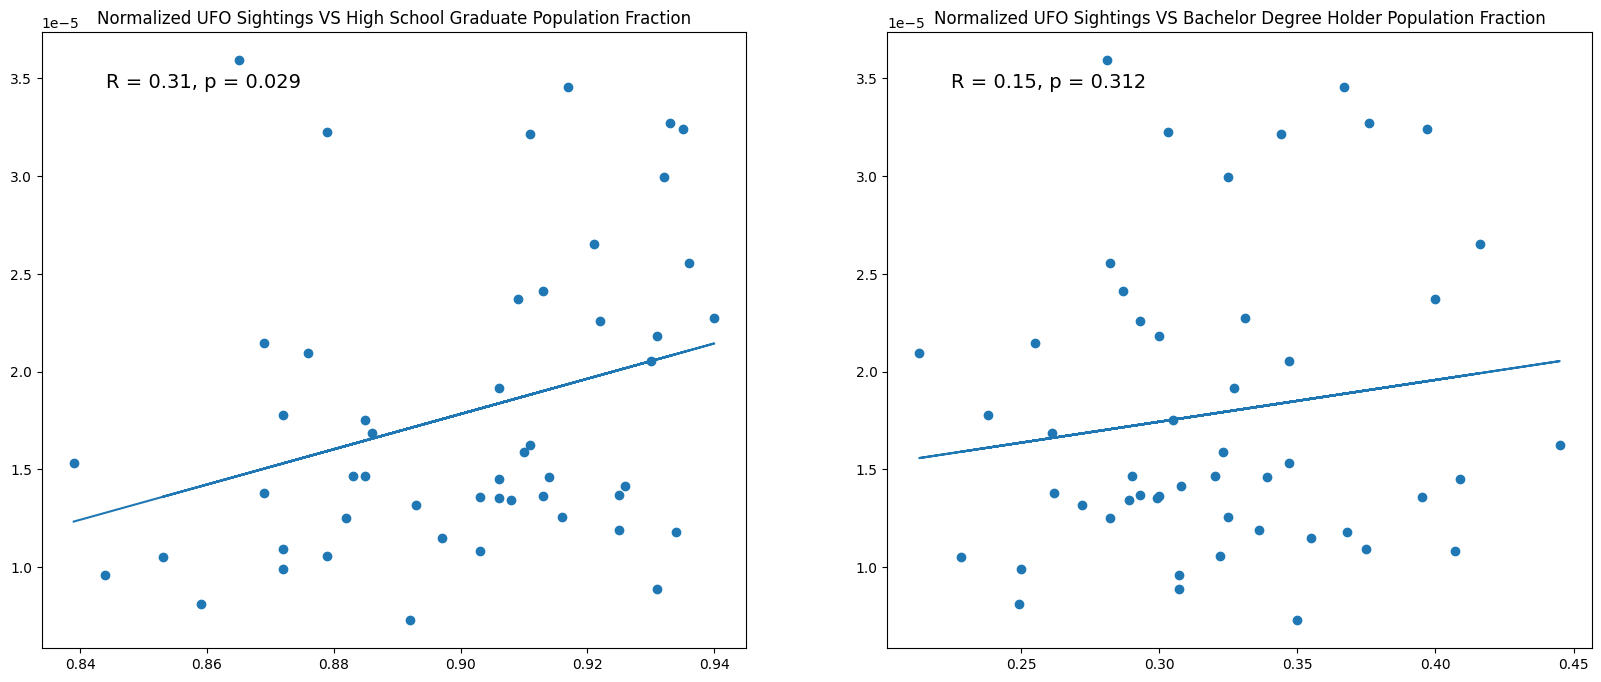

In [18]:
# data for plots

bachelors = np.array([])
high_school = np.array([])

for idx, state in enumerate(pop['State Abbreviation']):
    row = education_data['State Abbreviation'] == state
    bachelors = np.append(bachelors, education_data[row]['Bachelors or Higher'])
    high_school = np.append(high_school, education_data[row]['High School or Higher'])


# plots

fit, ax = plt.subplots(1, 2, figsize=[20, 8])
ax[0].scatter(high_school, normalized_ufo_sightings)
ax[0].set_title('Normalized UFO Sightings VS High School Graduate Population Fraction')

ax[1].scatter(bachelors, normalized_ufo_sightings)
ax[1].set_title('Normalized UFO Sightings VS Bachelor Degree Holder Population Fraction')


# linear regression

m8, b8 = np.polyfit(high_school, normalized_ufo_sightings, 1)
m9, b9 = np.polyfit(bachelors, normalized_ufo_sightings, 1)

r8, p8 = stats.pearsonr(high_school, normalized_ufo_sightings)
r9, p9 = stats.pearsonr(bachelors, normalized_ufo_sightings)

ax[0].plot(high_school, m8 * high_school + b8)
ax[0].annotate(f'R = {np.round(r8, 2)}, p = {np.round(p8, 3)}', chart_coords(high_school, normalized_ufo_sightings, position='ul'), fontsize=14)

ax[1].plot(bachelors, m9 * bachelors + b9)
ax[1].annotate(f'R = {np.round(r9, 2)}, p = {np.round(p9, 3)}', chart_coords(bachelors, normalized_ufo_sightings, position='ul'), fontsize=14)

plt.show()

### Conclusion of Education Level Analysis
    In both cases of education level (high school vs college graduates) we observe a positive relationship with the normalized events of UFO sightings, though this relationship was slightly stronger among the high school grad population
    
    Overall, these relationships are relatively weak
---

## Substance (Ab)use

In [19]:
drug_data = pd.read_csv('drug-use-data.csv', sep=',')
drug_data.head()

,Overall Rank,State Abbreviation,State,Total Score,Drug Use & Addiction Rank,Law Enforcement Rank,Drug Health Issues & Rehab Rank
0,1,NM,New Mexico,69.89,1,13,2
1,2,WV,West Virginia,63.56,5,3,18
2,3,NV,Nevada,56.93,11,29,1
3,4,DC,District of Columbia,56.61,3,31,3
4,5,CO,Colorado,56.46,16,4,17


In [20]:
drug_data.shape

(51, 7)

#### Quick Drugs Use / Health Issues Data

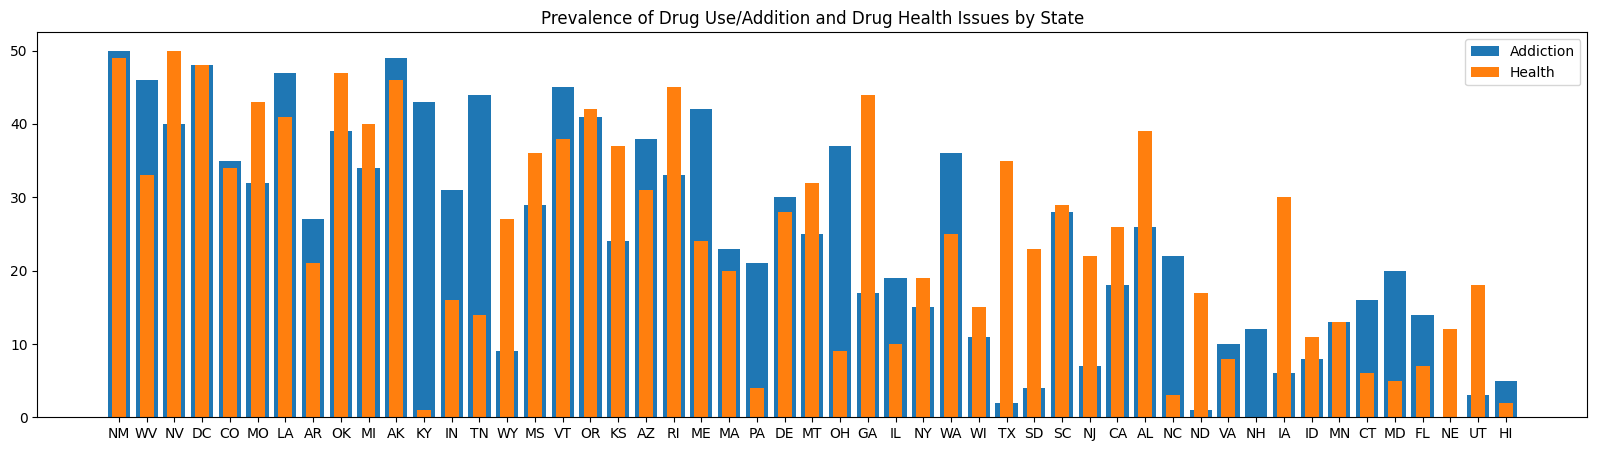

In [21]:
plt.figure(figsize=[20, 5])
plt.bar(drug_data['State Abbreviation'], 51 - drug_data['Drug Use & Addiction Rank'])
plt.bar(drug_data['State Abbreviation'], 51 - drug_data['Drug Health Issues & Rehab Rank'], width=0.5)
plt.title('Prevalence of Drug Use/Addition and Drug Health Issues by State')
plt.legend(['Addiction', 'Health'])
plt.show()

#### Normalized UFO Sightings VS Average % Population Drug Use

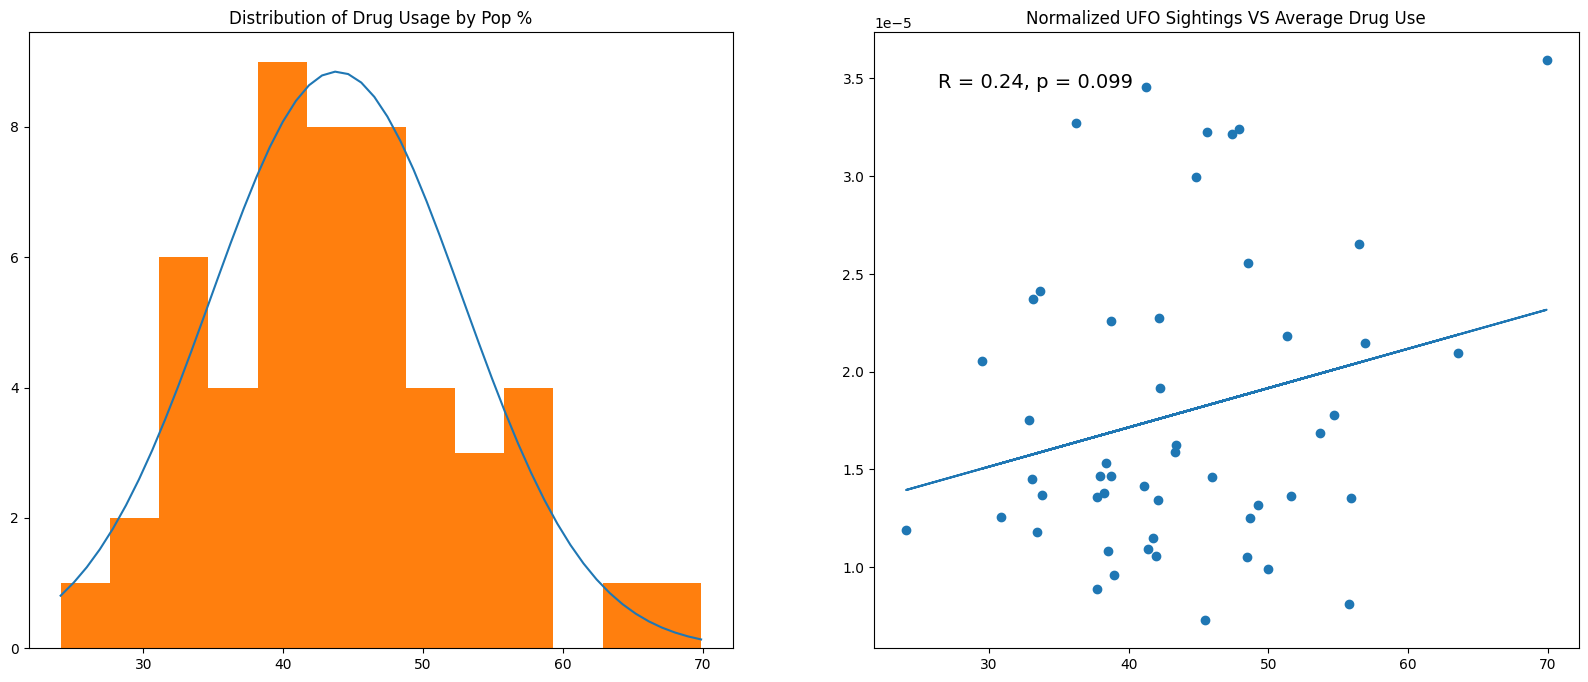

In [22]:
# data for plots

x = np.linspace(np.min(drug_data['Total Score']), np.max(drug_data['Total Score']))
drug_scores = np.array([])

for idx, state in enumerate(pop['State Abbreviation']):
    row = drug_data['State Abbreviation'] == state
    drug_scores = np.append(drug_scores, drug_data[row]['Total Score'])

r5, p5 = stats.pearsonr(drug_scores, normalized_ufo_sightings)


# plots

fit, ax = plt.subplots(1, 2, figsize=[20, 8])
ax[0].plot(x, 200 * stats.norm.pdf(x, np.mean(drug_data['Total Score']), np.std(drug_data['Total Score'])))

ax[0].hist(drug_data['Total Score'], bins=13)
ax[0].set_title('Distribution of Drug Usage by Pop %')

ax[1].scatter(drug_scores, normalized_ufo_sightings)
ax[1].set_title('Normalized UFO Sightings VS Average Drug Use')
ax[1].annotate(f'R = {np.round(r5, 2)}, p = {np.round(p5, 3)}', chart_coords(drug_scores, normalized_ufo_sightings, position='ul'), fontsize=14)


# linear regression

m5, b5 = np.polyfit(drug_scores, normalized_ufo_sightings, 1)
ax[1].plot(drug_scores, m5 * drug_scores + b5)

plt.show()

### Conclusion of Drug Use Relation Analysis
    From the visualization of the data, we see the average percentage of a state's population that actively uses drugs is around 40%

    We have concluded there is a positive relationship between UFO sightings and the fraction of the population using illicit substances

    It is worth noting the scatter plot displays a relatively weak correlation overall
---
    

# Part 3:
## Combined Influence of Observer Characteristics
Now, what if we formulate an equation to give each category some weighted influence on the output readings?\
We can use the computed correlation coefficients as the relative weights of each category and compute a weighted average for comparison

### Weighted Average Approach

In [23]:
%%latex
\begin{align}
\frac{(0.16 * Avg IQ) + (0.12 * Avg SAT) + (0.18 * Literacy) + (0.23 * Numeracy) + (0.25 * Drug Use) + (0.21 * High School) + (0.14 * College)}{0.16 + 0.12 + 0.18 + 0.23 + 0.25 + 0.21 + 0.14}
\end{align}

<IPython.core.display.Latex object>

#### normalize the array values so the results are not skewed by any one metric

In [24]:
''' Data for plots '''

# no drug data used

WEIGHTED_INTELLIGENCE = (r1 * iq_scores/np.max(iq_scores) - r2 * sat_scores/np.max(sat_scores) + r3 * literacy/np.max(literacy) +
                         r4 * numeracy/np.max(numeracy) + r8 * high_school/np.max(high_school) + r9 * bachelors/np.max(bachelors)) / (r1 - r2 + r3 + r4 + r8 + r9)
WEIGHTED_INTELLIGENCE.shape

# includes drug data

ENV_INFLUENCE = (r1 * iq_scores/np.max(iq_scores) - r2 * sat_scores/np.max(sat_scores) + r3 * literacy/np.max(literacy) + 
                 r4 * numeracy/np.max(numeracy) + r5 * drug_scores/np.max(drug_scores) + r8 * high_school/np.max(high_school) + r9 * bachelors/np.max(bachelors)) / (r1 - r2 + r3 + r4 + r5 + r8 + r9)
ENV_INFLUENCE.shape

(50,)

#### plot results

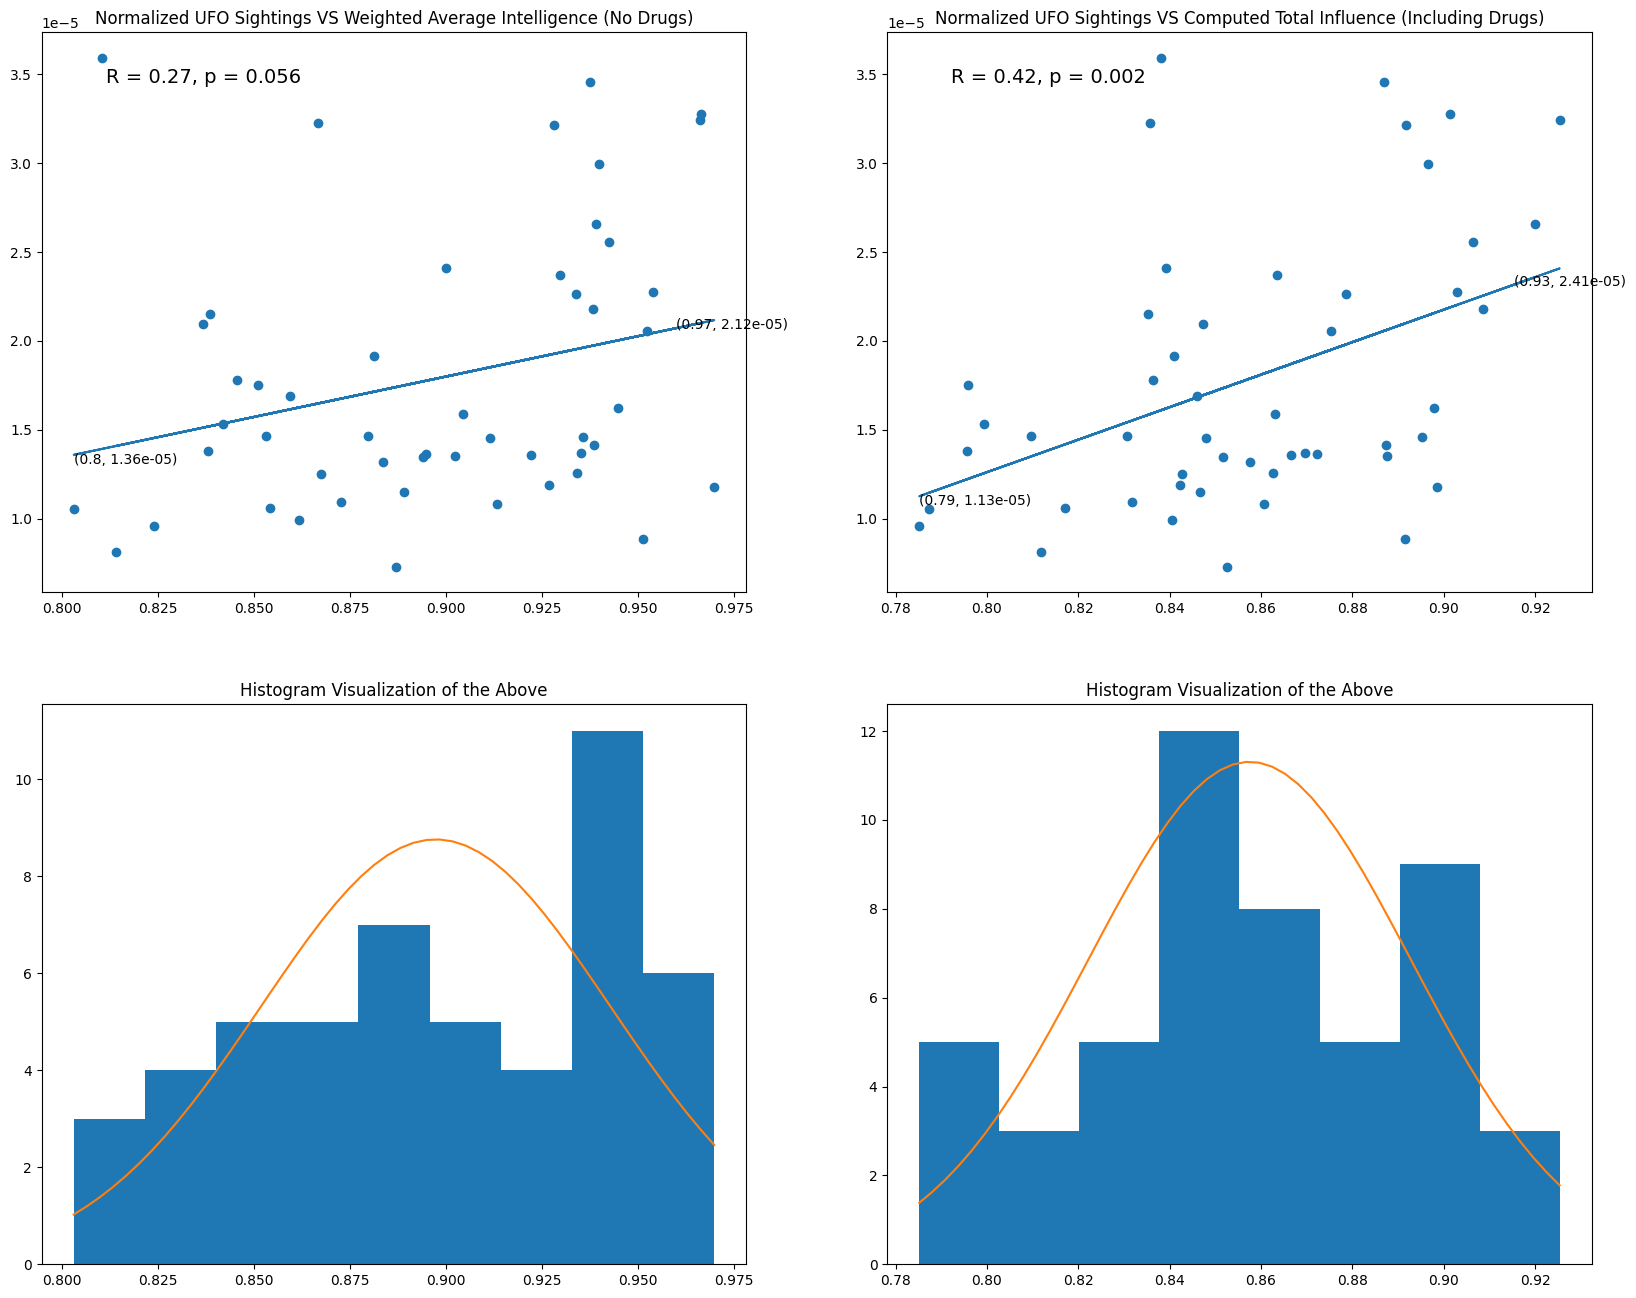

In [25]:
# linear regression

m6, b6 = np.polyfit(WEIGHTED_INTELLIGENCE, normalized_ufo_sightings, 1)
r6, p6 = stats.pearsonr(WEIGHTED_INTELLIGENCE, normalized_ufo_sightings)

m7, b7 = np.polyfit(ENV_INFLUENCE, normalized_ufo_sightings, 1)
r7, p7 = stats.pearsonr(ENV_INFLUENCE, normalized_ufo_sightings)

x1 = np.linspace(np.min(ENV_INFLUENCE), np.max(ENV_INFLUENCE))
x2 = np.linspace(np.min(WEIGHTED_INTELLIGENCE), np.max(WEIGHTED_INTELLIGENCE))


# plots

fit, ax = plt.subplots(2, 2, figsize=[20, 16])
ax[0, 0].scatter(WEIGHTED_INTELLIGENCE, normalized_ufo_sightings)
ax[0, 0].plot(WEIGHTED_INTELLIGENCE, m6 * WEIGHTED_INTELLIGENCE + b6)
ax[0, 0].set_title('Normalized UFO Sightings VS Weighted Average Intelligence (No Drugs)')

ax[0, 0].annotate(f'R = {np.round(r6, 2)}, p = {np.round(p6, 3)}', chart_coords(WEIGHTED_INTELLIGENCE, normalized_ufo_sightings, position='ul'), fontsize=14)
ax[0, 0].text(np.min(x2), m6 * np.min(x2) + b6 - 0.05e-5, f'{np.round(np.min(x2), 2), np.round(m6 * np.min(x2) + b6, 7)}')
ax[0, 0].text(np.max(x2) - 0.01, m6 * np.max(x2) + b6 - 0.05e-5, f'{np.round(np.max(x2), 2), np.round(m6 * np.max(x2) + b6, 7)}')


ax[0, 1].scatter(ENV_INFLUENCE, normalized_ufo_sightings)
ax[0, 1].plot(ENV_INFLUENCE, m7 * ENV_INFLUENCE + b7)
ax[0, 1].set_title('Normalized UFO Sightings VS Computed Total Influence (Including Drugs)')

ax[0, 1].annotate(f'R = {np.round(r7, 2)}, p = {np.round(p7, 3)}', chart_coords(ENV_INFLUENCE, normalized_ufo_sightings, position='ul'), fontsize=14)
ax[0, 1].text(np.min(x1), m7 * np.min(x1) + b7 - 0.05e-5, f'{np.round(np.min(x1), 2), np.round(m7 * np.min(x1) + b7, 7)}')
ax[0, 1].text(np.max(x1) - 0.01, m7 * np.max(x1) + b7 - 0.1e-5, f'{np.round(np.max(x1), 2), np.round(m7 * np.max(x1) + b7, 7)}')


ax[1, 0].hist(WEIGHTED_INTELLIGENCE, bins=np.linspace(np.min(WEIGHTED_INTELLIGENCE), np.max(WEIGHTED_INTELLIGENCE), 10))
ax[1, 0].plot(x2, stats.norm.pdf(x2, np.mean(WEIGHTED_INTELLIGENCE), np.std(WEIGHTED_INTELLIGENCE)))
ax[1, 0].set_title('Histogram Visualization of the Above')

ax[1, 1].hist(ENV_INFLUENCE, bins=np.linspace(np.min(ENV_INFLUENCE), np.max(ENV_INFLUENCE), 9))
ax[1, 1].plot(x1, stats.norm.pdf(x1, np.mean(ENV_INFLUENCE), np.std(ENV_INFLUENCE)))
ax[1, 1].set_title('Histogram Visualization of the Above')


plt.show()

## Multivariate Regression Analysis

In [26]:
# pandas df to dump data into

multi_regression_data = pd.DataFrame({
    'IQ': iq_scores,
    'SAT': sat_scores,
    'Literacy': literacy,
    'Numeracy': numeracy,
    'HS grad': high_school,
    'College': bachelors,
    'Drugs': drug_scores
})

multi_regression_data.head()

,IQ,SAT,Literacy,Numeracy,HS grad,College,Drugs
0,95.5,1115.0,0.716,0.640,0.839,0.347,38.40
1,100.0,1001.0,0.718,0.615,0.844,0.307,38.98
2,98.4,983.0,0.763,0.652,0.885,0.305,32.89
3,100.7,1067.0,0.756,0.653,0.872,0.375,41.36
4,101.5,1091.0,0.819,0.713,0.910,0.323,43.30


In [27]:
model = smf.OLS(normalized_ufo_sightings, multi_regression_data).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              54.17
Date:                Thu, 20 Jun 2024   Prob (F-statistic):                    2.85e-19
Time:                        20:36:27   Log-Likelihood:                          528.62
No. Observations:                  50   AIC:                                     -1043.
Df Residuals:                      43   BIC:                                     -1030.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

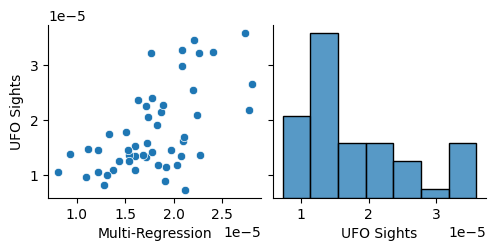

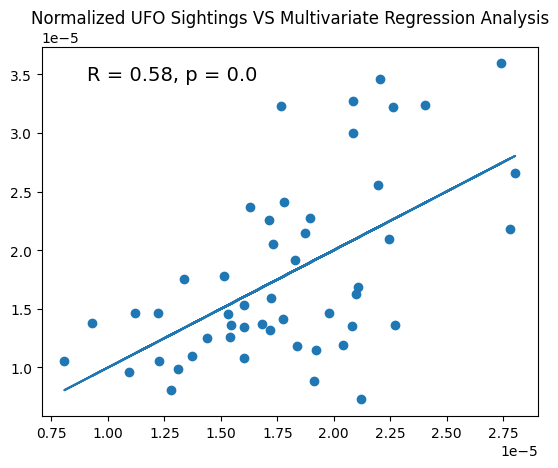

In [54]:
coeffs = model.params

output = coeffs * multi_regression_data
sums = np.sum(output, axis=1)

m10, b10 = np.polyfit(sums, normalized_ufo_sightings, 1)
r10, p10 = stats.pearsonr(sums, normalized_ufo_sightings)

sns.pairplot(pd.DataFrame({'Multi-Regression': sums, 'UFO Sights': normalized_ufo_sightings}), y_vars=['UFO Sights'])

plt.figure()
plt.scatter(sums, normalized_ufo_sightings)
plt.plot(sums, m10 * sums + b10)
plt.annotate(f'R = {np.round(r10, 2)}, p = {np.round(p10, 3)}', chart_coords(sums, normalized_ufo_sightings, position='ul'), fontsize=14)
plt.title('Normalized UFO Sightings VS Multivariate Regression Analysis')
plt.show()

### Conclusion of Overall Data Analysis
#### WEIGHTED AVERAGE APPROACH:
    
    When considering the blend of intelligence and education data (excluding any drug use) a positive relationship is seen with a rather weak correlation. Including the weight of influence from drug usage, we see the trend double in strength, forming a moderate positive correlation.

    We also observe that the results of the Weighted Intelligence do not follow a well defined normal distribution. Contrarily, the Total Influence Factor does adhere to a loosely defined normal distribution.


#### MULTIVARIATE REGRESSION:

    The results of the multivariate regression rendered an even stronger relationship between the blend of observer characteristics and UFO occurrences. With a regression coefficient of 0.58, and a fairly high slope in the linear fit, it is evident there is a statistical connection between our variables.


#### Verdict:
    From our analysis, we can reject the Null Hypothesis that *NO* relation is seen between observer characteristics and the normalized instances of UFO sightings
---

# Notes

#### P value info

In [30]:
stats.pearsonr(sums, normalized_ufo_sightings)

PearsonRResult(statistic=0.5795370313500388, pvalue=1.0336370422241688e-05)

p val indicates likelihood that the results of the sample were due to random chance 

    p = 0:  unlikely to be random
    p = 1:  likely to be random

#### TODO:
FINISH REGRESSION ANALYSIS

- [] add confidence interval testing
- [X] use regression tables
- [X] build multi-variate regression model


OTHER

- geographic analysis (weather related)
- proximity to aviation/military bases

# Export as HTML

In [31]:
os.system('jupyter nbconvert project.ipynb --to html')

0